# 1) Import Libraries

In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram,plot_bloch_multivector,plot_state_qsphere,plot_bloch_vector,array_to_latex
from IPython.display import display, Markdown

*** Steps for Implementing a gate: ***
1. Define quantum circuit with nq qubits and nc classical bits.
2. Initialize quibits.
3. Apply gates
5. Get the output statevector using statevector_simulator. Visualize the statevector using qshpere
6. Measure the qubits.
7. Simulate the circuit for n shots using qasm_simulator
8. Plot the probabities/counts obtained from step 7

# 2) Flip Gate (X Gate)

### Logic behind the X Gate: 
### 0 --X-- 1 
### 1 --X-- 0

In [2]:
#Create a quantum circuit with 1 qubit and 1 classical bit
circuit=QuantumCircuit(1,1)

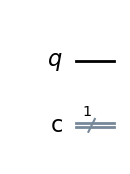

In [3]:
#draw the circuit
circuit.draw(output="mpl")

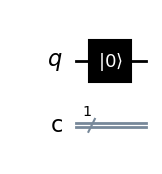

In [4]:
#assign |0> state to the qubit (optional as |0> is assigned by default)
circuit.reset(0)
circuit.draw(output="mpl")

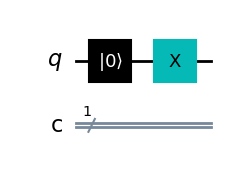

In [5]:
#Applying Flip Gate
circuit.x(0)
circuit.draw(output="mpl")

In [6]:
# calling statevector_simulator from backend of Aer
backend = Aer.get_backend('statevector_simulator')

#return transpiled circuit 
transpiledcircuit = transpile(circuit,backend)

#excute the simulator
result = execute(transpiledcircuit,backend).result()

In [7]:
#displaying statevector
statevector=result.get_statevector(transpiledcircuit)
print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [8]:
# Display the statevector cleanly in LaTeX format
latex_statevector = array_to_latex(statevector)
display(Markdown("Output statevector:"))
display(latex_statevector)

Output statevector:

<IPython.core.display.Latex object>

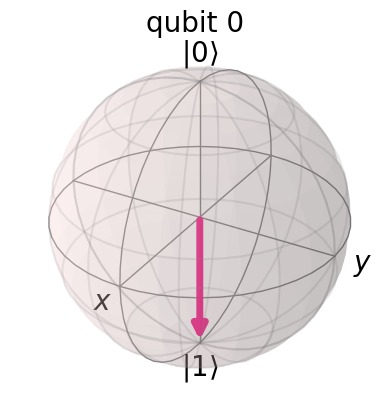

In [9]:
#plotting bloch sphere 
plot_bloch_multivector(statevector)

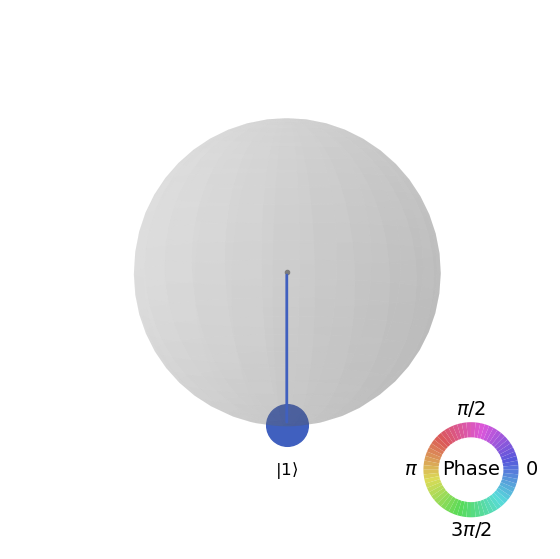

In [10]:
#plotting qsphere
plot_state_qsphere(statevector)

### 2a) Using unitary matrix

In [11]:
# Use the unitary simulator backend
backend = Aer.get_backend('unitary_simulator')

# Transpile the circuit for the unitary simulator backend
transpiled_circuit = transpile(circuit, backend)

# Execute the simulation
result = execute(transpiled_circuit, backend).result()

# Get the unitary matrix from the result
unitary_matrix = result.get_unitary(transpiled_circuit)

# Print the unitary matrix
print("Unitary matrix representing the flip gate:")
print(np.round(unitary_matrix, 3))

Unitary matrix representing the flip gate:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


### 2b) Measuring qubits


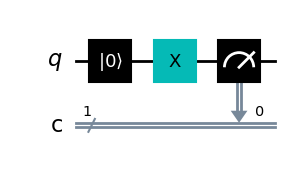

In [12]:
# measure means measuring the qubit at index 0 and then storing the result in classical qubit at index 0
circuit.measure([0],[0])
circuit.draw('mpl')

In [13]:
# aer simulator
backend = Aer.get_backend('qasm_simulator')

#return transpiled circuit using transpile
transpiledcircuit = transpile(circuit,backend)

#excute the simulation for 1024 shots
result = execute(transpiledcircuit,backend,shots=1024).result()

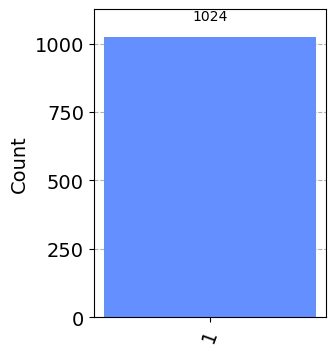

In [14]:
#get the counts and plot histogram
counts=result.get_counts(transpiledcircuit)
plot_histogram(counts,figsize=(3,4))

# 3) Phase Flip Gate (Z Gate)

### |0>  --Z--   |0>
### |1> --Z-- (-|1>)
### |+> --Z-- |->
### |-> --Z-- |+>

In [15]:
#Create a quantum circuit with 1 qubit and 1 classical bit
circuit=QuantumCircuit(1,1)

In [16]:
#assign |0> state to the qubit (optional as |0> is assigned by default)
circuit.reset(0)

#since we do not have any effect of flip gate on |0> we use normal flip gate to make it |1>
circuit.x(0)

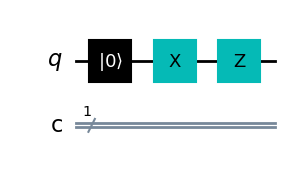

In [17]:
#Applying Phase Flip Gate
circuit.z(0)
circuit.draw(output="mpl")

In [18]:
## calling statevector_simulator from backend of Aer
backend = Aer.get_backend('statevector_simulator')

#return transpiled circuit using transpile
transpiledcircuit = transpile(circuit,backend)

#excute the simulator
result = execute(transpiledcircuit,backend).result()

In [19]:
## Display the statevector cleanly in LaTeX format
statevector=result.get_statevector(transpiledcircuit)
latex_statevector = array_to_latex(statevector)
display(Markdown("Output statevector:"))
display(latex_statevector)

Output statevector:

<IPython.core.display.Latex object>

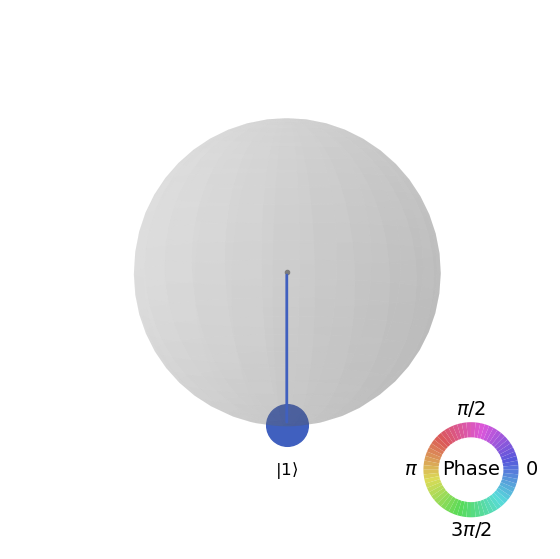

In [20]:
# plotting the qsphere
plot_state_qsphere(statevector)

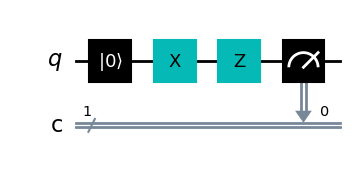

In [21]:
# measure means measuring the qubit at index 0 and then storing the result in classical qubit at index 0
circuit.measure([0],[0])
circuit.draw(output="mpl")

In [22]:
# aer simulator
backend = Aer.get_backend('qasm_simulator')

#return transpiled circuit using transpile
transpiledcircuit = transpile(circuit,backend)

#excute the simulation for 1024 shots
result = execute(transpiledcircuit,backend,shots=1024).result()

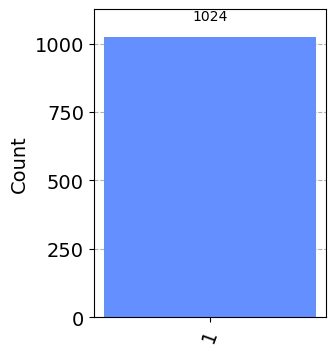

In [23]:
#get the counts and plotting histogram
counts=result.get_counts(transpiledcircuit)
plot_histogram(counts,figsize=(3,4))

# 4) Hadamard Gate (H Gate)

### |0⟩ --H--  |+>
### |1⟩ --H-- |->

In [32]:
# Create a quantum circuit with 1 qubit and 1 classical bit
circuit=QuantumCircuit(1,1)

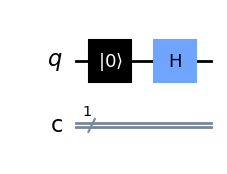

In [33]:
# assign |0> state to the qubit (optional as |0> is assigned by default)
circuit.reset(0)

# Applying hadamard gate
circuit.h(0)
circuit.draw(output="mpl")

In [34]:
# calling statevector_simulator from backend of Aer
backend = Aer.get_backend('statevector_simulator')

# return transpiled circuit using transpile
transpiledcircuit = transpile(circuit,backend)

# excute the simulator
result = execute(transpiledcircuit,backend).result()

# Get the statevector from the result
statevector = result.get_statevector()

# Display the statevector cleanly in LaTeX form
latex_statevector = array_to_latex(statevector)
display(Markdown("Output statevector:"))
display(latex_statevector)

Output statevector:

<IPython.core.display.Latex object>

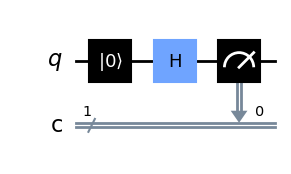

In [35]:
# measure means measuring the qubit at index 0 and then storing the result in classical qubit at index 0
circuit.measure(0,0)
circuit.draw(output="mpl")

In [40]:
# aer simulator
backend = Aer.get_backend('qasm_simulator')

#return transpiled circuit using transpile
transpiledcircuit = transpile(circuit,backend)

#excute the simulation for 1024 shots
result = execute(transpiledcircuit,backend,shots=10024).result()

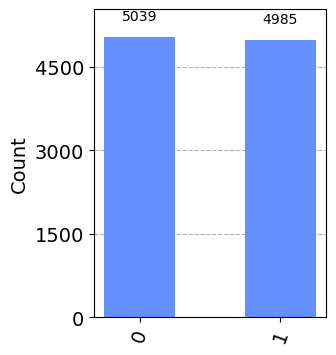

In [41]:
#get the counts and plot histogram
counts=result.get_counts(transpiledcircuit)
plot_histogram(counts,figsize=(3,4))

# 5) controlled NOT gate (cNOT Gate)

### |Control qubit> |Target qubit> --> |Control qubit> |Target qubit>
### |0> |0> -C-> |0> |0>
### |0> |1> -C-> |0> |1>
### |1> |0> -C-> |1> |1>
### |1> |1> -C-> |1> |0>

In [42]:
#Create a quantum circuit with 1 qubit and 1 classical bit
circuit=QuantumCircuit(2,2)

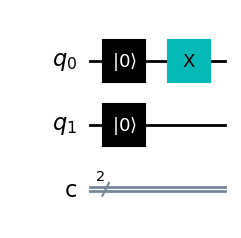

In [43]:
#assign |0> state to the qubit (optional as |0> is assigned by default)
circuit.reset(0)
# invertng the qubit at index 0 because 00 and 01 has no effect on c-Not gate. Hence we made it to 10 so that the result will be visible
circuit.x(0)

#assign |0> state to the qubit (optional as |0> is assigned by default)
circuit.reset(1)
circuit.draw(output="mpl")

In [44]:
# Applying the c-Not gate
circuit.cx(0,1)

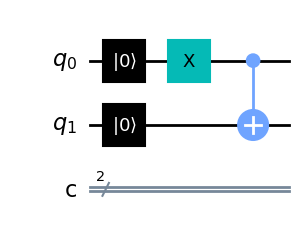

In [45]:
circuit.draw(output="mpl")

In [46]:
# calling statevector_simulator from backend of Aer
backend = Aer.get_backend('statevector_simulator')

#return transpiled circuit using transpile
transpiledcircuit = transpile(circuit,backend)

#excute the simulator
result = execute(transpiledcircuit,backend).result()

In [47]:
# Display the statevector cleanly in LaTeX format
statevector=result.get_statevector(transpiledcircuit)
latex_statevector = array_to_latex(statevector)
display(Markdown("Output statevector"))
display(latex_statevector)

Output statevector

<IPython.core.display.Latex object>

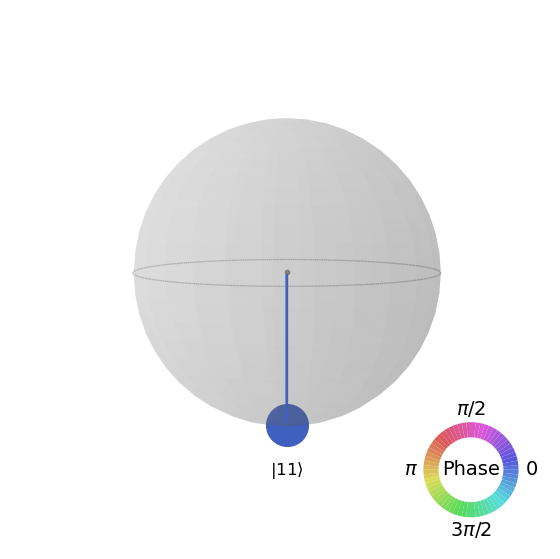

In [48]:
# Plotting q-sphere
plot_state_qsphere(statevector)

In [49]:
# measure means measuring the qubit at index 0 and index 1 and then storing the result in classical qubit at index 0 and index 1 respectively
circuit.measure([0,1],[0,1])

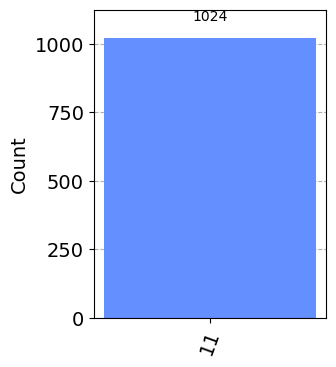

In [50]:
# aer simulator
backend = Aer.get_backend('qasm_simulator')

#return transpiled circuit using transpile
transpiledcircuit = transpile(circuit,backend)

#excute the simulation for 1024 shots
result = execute(transpiledcircuit,backend,shots=1024).result()

#get the counts and plot_histogram
counts=result.get_counts(transpiledcircuit)
plot_histogram(counts,figsize=(3,4))

# 6) Prove the equivalence: X = HZH

In [51]:
# Create two quantum circuits
circuit1 = QuantumCircuit(1)
circuit2 = QuantumCircuit(1)

# Apply X gate to the first circuit
circuit1.x(0)

# Apply HZH to the second circuit
circuit2.h(0)
circuit2.z(0)
circuit2.h(0) 

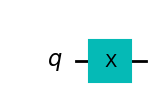

In [52]:
circuit1.draw(output="mpl")

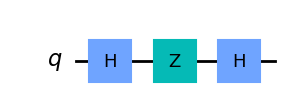

In [53]:
circuit2.draw(output="mpl")

In [54]:
# Use statevector simulator to get the output states
backend = Aer.get_backend('statevector_simulator')
result1_0 = execute(circuit1,backend).result().get_statevector()
result2_0 = execute(circuit2,backend).result().get_statevector()

In [55]:
# Compare outputs for |0⟩ state
print("Output for |0⟩ state:")
display(Markdown("X statevector"))
display(array_to_latex(result1_0))
display(Markdown("HZH statevector"))
display(array_to_latex(result2_0))

Output for |0⟩ state:


X statevector

<IPython.core.display.Latex object>

HZH statevector

<IPython.core.display.Latex object>

In [56]:
# Now, let's test the |1⟩ state
circuit1 = QuantumCircuit(1)
circuit2 = QuantumCircuit(1)

#initialize both the circuits with |1> stae
circuit1.initialize([0, 1], 0)
circuit2.initialize([0, 1], 0)

# Apply X gate to the first circuit
circuit1.x(0)

# Apply HZH to the second circuit
circuit2.h(0)
circuit2.z(0)
circuit2.h(0) 

# Use statevector simulator to get the output states
simulator = Aer.get_backend('statevector_simulator')
result1_1 = execute(circuit1,backend).result().get_statevector()
result2_1 = execute(circuit2,backend).result().get_statevector()

# Compare outputs for |1⟩ state
print("Output for |1⟩ state:")
display(Markdown("X statevector"))
display(array_to_latex(result1_1))
display(Markdown("HZH statevector"))
display(array_to_latex(result2_1))

Output for |1⟩ state:


X statevector

<IPython.core.display.Latex object>

HZH statevector

<IPython.core.display.Latex object>

# 7) Entanglement

### 7a) Phi+ bell state
$$
|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

In [57]:
#Create a quantum circuit with 2 qubit and 2 classical bit
circuit= QuantumCircuit(2,2)

#Apply hadamard gate
circuit.h(0)

#Apply c-Not gate
circuit.cx(0,1)

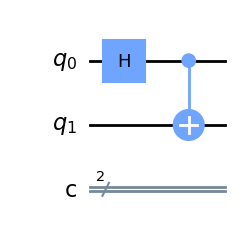

In [58]:
circuit.draw('mpl')

Output statevector

<IPython.core.display.Latex object>

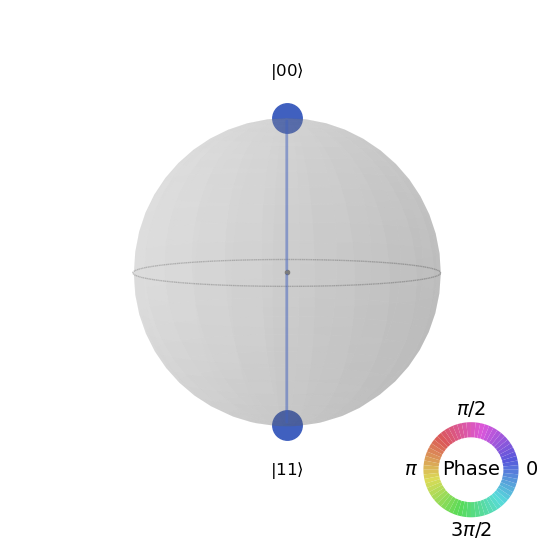

In [59]:
# calling statevector_simulator from backend of Aer
backend_svec = Aer.get_backend('statevector_simulator')

#return transpiled circuit 
transpiledcircuit_svec = transpile(circuit,backend_svec)

#excute the simulation for statevector
results_svec = execute(transpiledcircuit_svec,backend_svec).result()

# Display the statevector cleanly in LaTeX format
statevector=results_svec.get_statevector(transpiledcircuit_svec)
latex_statevector = array_to_latex(statevector)
display(Markdown("Output statevector"))
display(latex_statevector)
plot_state_qsphere(statevector)

In [ ]:
# calculating the amplitudes for the state_vector
amplitudes = statevector.data
for i, amplitude in enumerate(amplitudes):
    print(f"Amplitude for state |{format(i, '0' + str(statevector.num_qubits) + 'b')}>: {amplitude}")

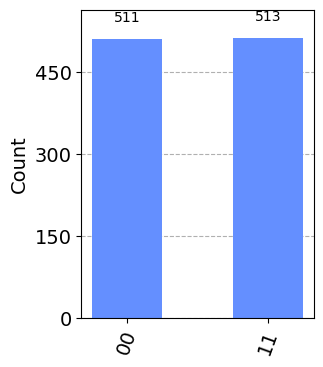

In [60]:
# measure means measuring the qubit at index 0 and index 1 and then storing the result in classical qubit at index 0 and index 1 respectively
circuit.measure([0,1],[0,1])

# apply the qasm simulator
backend_qasm= Aer.get_backend('qasm_simulator')

#return transpiled circuit using transpile
transpiledcircuit_qasm = transpile(circuit,backend_qasm)

#excute the simulation for 1024 shots
results_qasm = execute(transpiledcircuit_qasm,backend_qasm,shots=1024).result()

#get the counts and plot histogram
counts=results_qasm.get_counts(transpiledcircuit_qasm)
plot_histogram(counts,figsize=(3,4))

### 7b) Phi- bell state
$$
|\phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)
$$

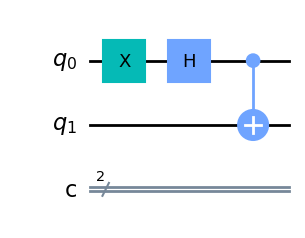

In [61]:
#Create a quantum circuit with 2 qubit and 2 classical bit
circuit= QuantumCircuit(2,2)

# Apply flip gate to qubit at index 0 
circuit.x(0)

# Further apply hadamard gate to qubit at index 0
circuit.h(0)

# Apply c-Not gate
circuit.cx(0,1)
circuit.draw('mpl')

Output statevector

<IPython.core.display.Latex object>

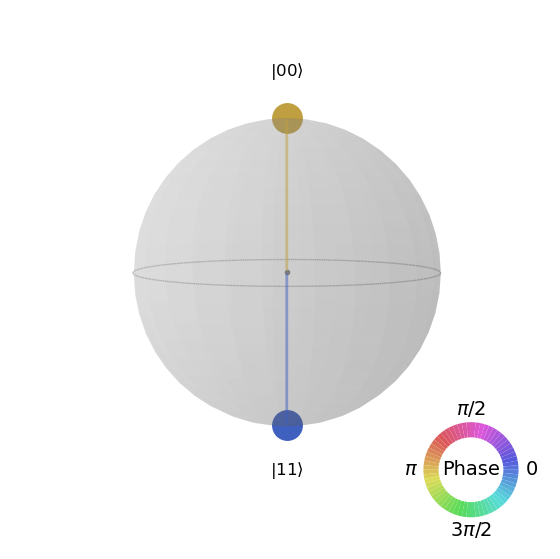

In [62]:
# calling statevector_simulator from backend of Aer
backend_svec = Aer.get_backend('statevector_simulator')

#return transpiled circuit 
transpiledcircuit_svec = transpile(circuit,backend_svec)

#excute the simulation for statevector
results_svec = execute(transpiledcircuit_svec,backend_svec).result()

# Display the statevector cleanly in LaTeX format
statevector=results_svec.get_statevector(transpiledcircuit_svec)
latex_statevector = array_to_latex(statevector)
display(Markdown("Output statevector"))
display(latex_statevector)
plot_state_qsphere(statevector)

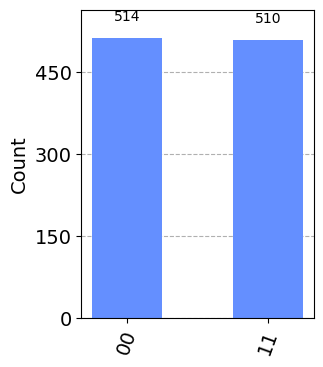

In [63]:
# measure means measuring the qubit at index 0 and index 1 and then storing the result in classical qubit at index 0 and index 1 respectively
circuit.measure([0,1],[0,1])

# Apply qasm simulator
backend_qasm= Aer.get_backend('qasm_simulator')

#return transpiled circuit using transpile
transpiledcircuit_qasm = transpile(circuit,backend_qasm)

#excute the simulation for 1024 shots
results_qasm = execute(transpiledcircuit_qasm,backend_qasm,shots=1024).result()

#get the counts and plot histogram
counts=results_qasm.get_counts(transpiledcircuit_qasm)
plot_histogram(counts,figsize=(3,4))

### 7c) Psi+ bell state
$$ 
|\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle +|10\rangle)
$$

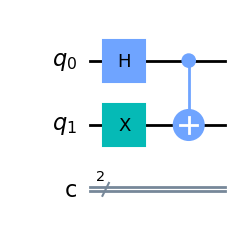

In [64]:
#Create a quantum circuit with 2 qubit and 2 classical bit
circuit= QuantumCircuit(2,2)

#Apply flip gate on qubit at index 1
circuit.x(1)

#Apply hadamard gate on qubit at index 0
circuit.h(0)

#Apply c-Not gate
circuit.cx(0,1)
circuit.draw('mpl')

Output statevector

<IPython.core.display.Latex object>

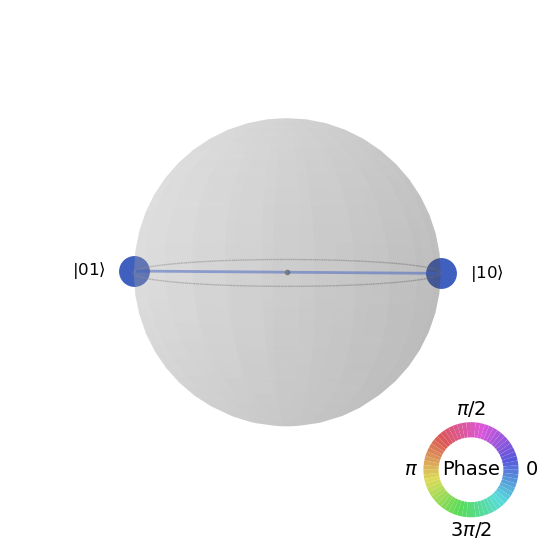

In [65]:
# calling statevector_simulator from backend of Aer
backend_svec = Aer.get_backend('statevector_simulator')

#return transpiled circuit 
transpiledcircuit_svec = transpile(circuit,backend_svec)

#excute the simulation for statevector
results_svec = execute(transpiledcircuit_svec,backend_svec).result()

# Display the statevector cleanly in LaTeX format
statevector=results_svec.get_statevector(transpiledcircuit_svec)
latex_statevector = array_to_latex(statevector)
display(Markdown("Output statevector"))
display(latex_statevector)
plot_state_qsphere(statevector)

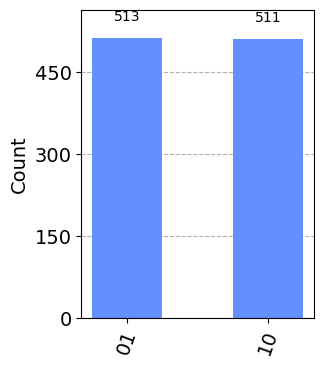

In [66]:
# measure means measuring the qubit at index 0 and index 1 and then storing the result in classical qubit at index 0 and index 1 respectively
circuit.measure([0,1],[0,1])

# Apply the qasm simulator
backend_qasm= Aer.get_backend('qasm_simulator')

#return transpiled circuit using transpile
transpiledcircuit_qasm = transpile(circuit,backend_qasm)

#excute the simulation for 1024 shots
results_qasm = execute(transpiledcircuit_qasm,backend_qasm,shots=1024).result()

#get the counts and plot histogram
counts=results_qasm.get_counts(transpiledcircuit_qasm)
plot_histogram(counts,figsize=(3,4))

### 7d) Psi- bell state
$$
|\psi-\rangle = \frac{1}{\sqrt{2}}(|01\rangle -|10\rangle)
$$

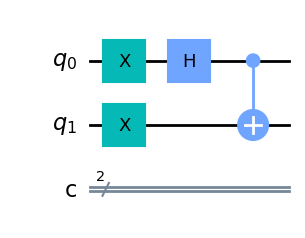

In [67]:
#Create a quantum circuit with 2 qubit and 2 classical bit
circuit= QuantumCircuit(2,2)

#Apply flip gate on qubit at index 0
circuit.x(0)

#Apply flip gate on qubit at index 1
circuit.x(1)

#Apply hadamard gate on qubit at index 0
circuit.h(0)

#Apply c-Not gate
circuit.cx(0,1)
circuit.draw('mpl')

Output statevector

<IPython.core.display.Latex object>

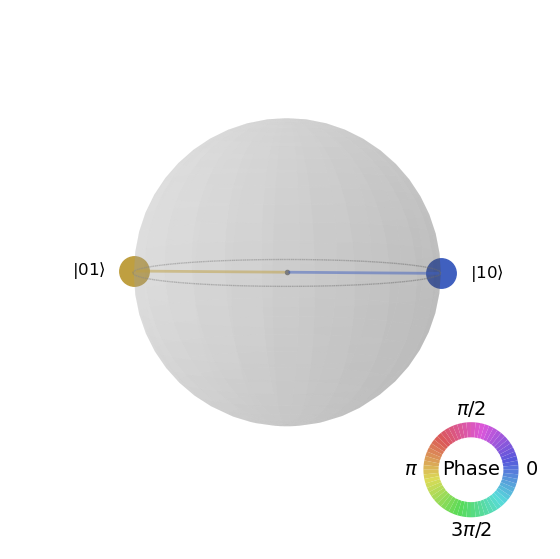

In [68]:
# calling statevector_simulator from backend of Aer
backend_svec = Aer.get_backend('statevector_simulator')

#return transpiled circuit 
transpiledcircuit_svec = transpile(circuit,backend_svec)

#excute the simulation for statevector
results_svec = execute(transpiledcircuit_svec,backend_svec).result()

# Display the statevector cleanly in LaTeX format
statevector=results_svec.get_statevector(transpiledcircuit_svec)
latex_statevector = array_to_latex(statevector)
display(Markdown("Output statevector"))
display(latex_statevector)
plot_state_qsphere(statevector)

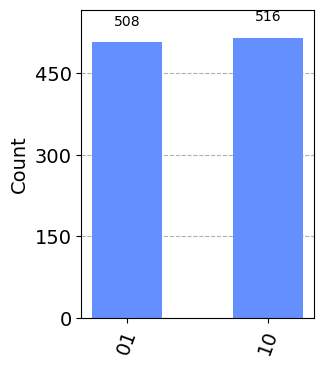

In [69]:
# measure means measuring the qubit at index 0 and index 1 and then storing the result in classical qubit at index 0 and index 1 respectively
circuit.measure([0,1],[0,1])

# Apply qasm simulator
backend_qasm= Aer.get_backend('qasm_simulator')

#return transpiled circuit using transpile
transpiledcircuit_qasm = transpile(circuit,backend_qasm)

#excute the simulation for 1024 shots
results_qasm = execute(transpiledcircuit_qasm,backend_qasm,shots=1024).result()

#get the counts and plot histogram
counts=results_qasm.get_counts(transpiledcircuit_qasm)
plot_histogram(counts,figsize=(3,4))

# 8) Teleportation

#### Transfer of quantum states from one qubit to another. i.e transfer of information. In classical computer, copying and transfering is not an issue but in quantum computers, copy is not allowed. In order to overcome, lets take entanglement as resource and then build qiskit teleportation circuit

In [70]:
#Create a quantum circuit with 3 qubit and 3 classical bit i.e. q0 being sender, q1 being entangled and q2 being receiver
circuit = QuantumCircuit(3,3)

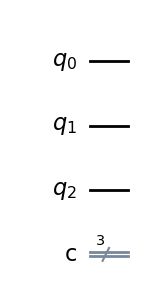

In [71]:
circuit.draw(output = "mpl")

In [72]:
# Apply flip gate to q0 make it set to 1 which is initial state and final would be to pass this one to q2 to make it 1
circuit.x(0)

In [73]:
circuit.barrier()

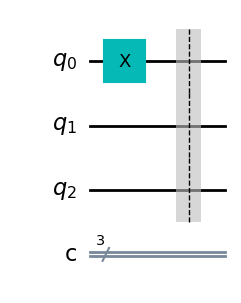

In [74]:
circuit.draw(output = "mpl")

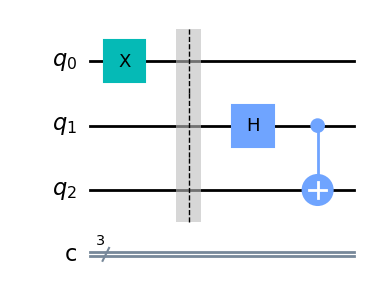

In [75]:
# create an entangled pair between 1 and 2
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output = "mpl")

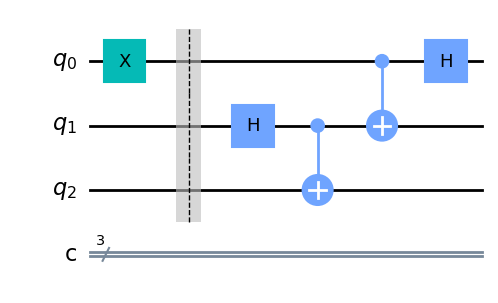

In [76]:
# apply teleportation protocol
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output = "mpl")

In [77]:
# measure the bits
circuit.measure([0,1], [0,1])

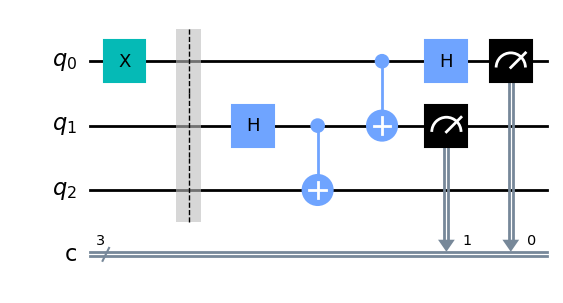

In [78]:
circuit.draw(output = "mpl")

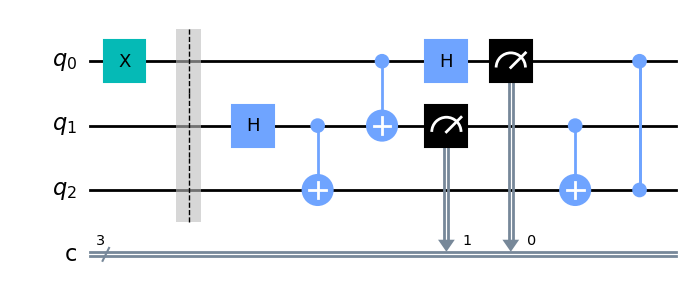

In [79]:
# send the result through channel
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output="mpl")

In [80]:
# q0 teleported to q2 with state 1
circuit.measure(2,2)
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()

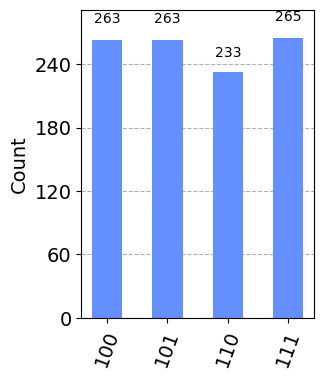

In [81]:
plot_histogram(counts,figsize=(3,4))

In [ ]:
#the histogram is read as c2,c1,c0
#hence we can see all the results have first digit as 1